In [2]:
! pip install nltk
!pip install newspaper3k
!pip install textblob
! pip install wordcloud


You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 215kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 7.4MB 42kB/s s eta 0:00:01███▉                    | 2.8MB 12.2MB/s eta 0:00:01     |██████████████████              | 4.2MB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 550kB/s eta 0:00:011
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=4727 sha256=a98ddb5720d150c7a744fdf94ae3549f697d5ba754b49f70bb0543929e19f15d
  Stored in directory: /home/nbuser/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7399105 sha256=1474378e3721e3f546cd4719ca467f6fe12e931b03f1b3c1d622d3df75d81501
  Stored in directory: /home/nbuser/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [4]:
df = pd.read_excel('amazon_reviews.xlsx')

In [5]:
df.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [6]:
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


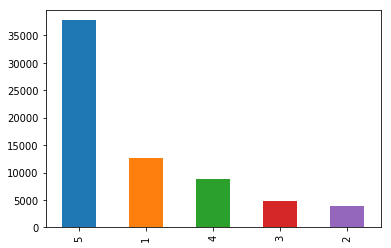

In [7]:
df['rating'].value_counts().plot(kind='bar')

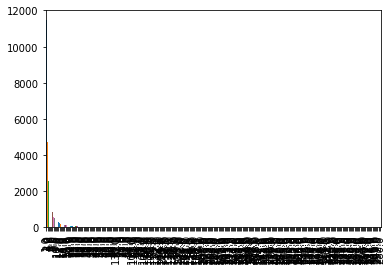

In [8]:
df['helpfulVotes'].value_counts().plot(kind='bar')

In [9]:
df['body'] = df['body'].astype(str)

In [10]:
df['body'][2]

"This is a great, reliable phone. I also purchased this phone after my samsung A460 died. The menu is easily comprehendable and speed dialing is available for around 300 numbers. Voice dialing is also a nice feature, but it takes longer than speed dialing. The only thing that bothers me is the games...Nokia seems to have taken snake (1 and 2) off their phones. There is a skydiving game, bowling, and tennis (like pong). The ringers are very nice, and a feature is available to choose a different ringer for each person calling. However, ringtones are not available online to download to this phone. You're pretty much stuck with what you have. There are vibrating ringtones and regular (midi) polyphonic tones. All they need are covers in a reasonable price range..."

In [11]:
df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
df['body'][2]

"this is a great, reliable phone. i also purchased this phone after my samsung a460 died. the menu is easily comprehendable and speed dialing is available for around 300 numbers. voice dialing is also a nice feature, but it takes longer than speed dialing. the only thing that bothers me is the games...nokia seems to have taken snake (1 and 2) off their phones. there is a skydiving game, bowling, and tennis (like pong). the ringers are very nice, and a feature is available to choose a different ringer for each person calling. however, ringtones are not available online to download to this phone. you're pretty much stuck with what you have. there are vibrating ringtones and regular (midi) polyphonic tones. all they need are covers in a reasonable price range..."

In [13]:
df['body'] = df['body'].str.replace('[^\w\s]','')
df['body'][2]

'this is a great reliable phone i also purchased this phone after my samsung a460 died the menu is easily comprehendable and speed dialing is available for around 300 numbers voice dialing is also a nice feature but it takes longer than speed dialing the only thing that bothers me is the gamesnokia seems to have taken snake 1 and 2 off their phones there is a skydiving game bowling and tennis like pong the ringers are very nice and a feature is available to choose a different ringer for each person calling however ringtones are not available online to download to this phone youre pretty much stuck with what you have there are vibrating ringtones and regular midi polyphonic tones all they need are covers in a reasonable price range'

In [14]:
nltk.download('stopwords')
stop = stopwords.words('english')
df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['body'][2]

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'great reliable phone also purchased phone samsung a460 died menu easily comprehendable speed dialing available around 300 numbers voice dialing also nice feature takes longer speed dialing thing bothers gamesnokia seems taken snake 1 2 phones skydiving game bowling tennis like pong ringers nice feature available choose different ringer person calling however ringtones available online download phone youre pretty much stuck vibrating ringtones regular midi polyphonic tones need covers reasonable price range'

In [15]:
st = PorterStemmer()
df['body'] = df['body'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['body'][2]

'great reliabl phone also purchas phone samsung a460 die menu easili comprehend speed dial avail around 300 number voic dial also nice featur take longer speed dial thing bother gamesnokia seem taken snake 1 2 phone skydiv game bowl tenni like pong ringer nice featur avail choos differ ringer person call howev rington avail onlin download phone your pretti much stuck vibrat rington regular midi polyphon tone need cover reason price rang'

In [16]:
most2 = pd.Series(' '.join(df['body']).split()).value_counts()[:10]
most2

phone      105280
use         23278
work        22281
great       20312
good        16428
batteri     15755
screen      15608
like        15380
one         14403
get         14314
dtype: int64

In [17]:
nltk.download('punkt')
TextBlob(df['body'][2]).words

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['great', 'reliabl', 'phone', 'also', 'purchas', 'phone', 'samsung', 'a460', 'die', 'menu', 'easili', 'comprehend', 'speed', 'dial', 'avail', 'around', '300', 'number', 'voic', 'dial', 'also', 'nice', 'featur', 'take', 'longer', 'speed', 'dial', 'thing', 'bother', 'gamesnokia', 'seem', 'taken', 'snake', '1', '2', 'phone', 'skydiv', 'game', 'bowl', 'tenni', 'like', 'pong', 'ringer', 'nice', 'featur', 'avail', 'choos', 'differ', 'ringer', 'person', 'call', 'howev', 'rington', 'avail', 'onlin', 'download', 'phone', 'your', 'pretti', 'much', 'stuck', 'vibrat', 'rington', 'regular', 'midi', 'polyphon', 'tone', 'need', 'cover', 'reason', 'price', 'rang'])

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

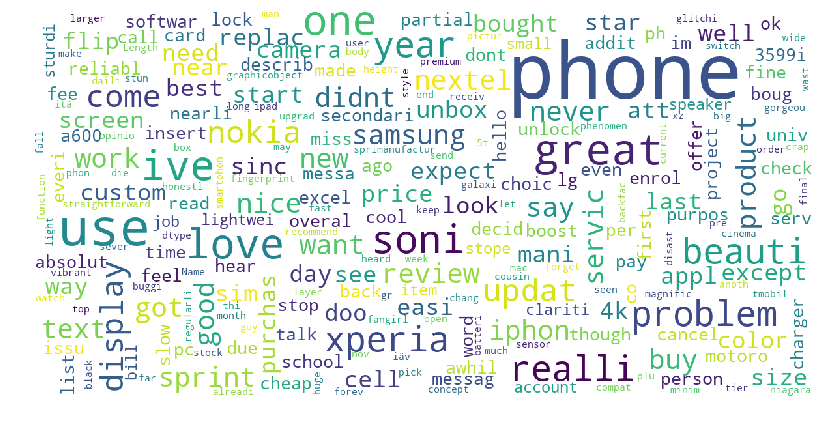

In [19]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['body'])

In [20]:
def senti(x):
    return TextBlob(x).sentiment  

df['senti_score'] = df['body'].apply(senti)
df.senti_score

0           (0.09602403343782656, 0.5532027168234065)
1                        (0.125, 0.30166666666666664)
2                           (0.3, 0.5711538461538462)
3            (0.4666666666666666, 0.6666666666666666)
4                       (0.1675, 0.42472222222222217)
5            (0.4431818181818182, 0.5647727272727273)
6           (0.27113095238095236, 0.4525595238095238)
7                                          (0.6, 1.0)
8                        (0.1875, 0.5958333333333333)
9                                        (0.45, 0.65)
10          (0.18796241637150732, 0.5174685163321527)
11         (0.10018939393939393, 0.28530011655011656)
12          (0.22455357142857138, 0.5261160714285714)
13          (0.23721590909090912, 0.5980113636363635)
14                                         (0.0, 0.0)
15                        (0.75, 0.24166666666666664)
16                          (0.4166666666666667, 0.5)
17                                         (0.0, 0.0)
18                          